In [ ]:
print("hello")

hello


# Model testing (groq, gemini, huggingface)

In [ ]:
from langchain_groq import ChatGroq
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_huggingface import ChatHuggingFace
from langchain_huggingface.llms import HuggingFaceEndpoint


def get_chat_model(
    provider: str,
    api_key: str,
    model_name: str,
    temperature: float = 0.3,
):
    provider = provider.lower()

    if provider == "groq":
        return ChatGroq(
            api_key=api_key,
            model=model_name,
            temperature=temperature,
        )

    elif provider == "gemini":
        return ChatGoogleGenerativeAI(
            google_api_key=api_key,
            model=model_name,
            temperature=temperature,
        )

    elif provider == "huggingface":
        llm = HuggingFaceEndpoint(
            repo_id=model_name,
            huggingfacehub_api_token=api_key,
            temperature=temperature,
        )
        return ChatHuggingFace(llm=llm)

    else:
        raise ValueError("Unsupported provider")


In [ ]:
from langchain.messages import HumanMessage, AIMessage, SystemMessage
from typing import List


def run_conversation(
    model,
    conversation: List[HumanMessage | AIMessage | SystemMessage],
):
    """
    Runs a LangChain chat model with full conversation history.
    Returns AIMessage.
    """
    response = model.invoke(conversation)

    if not isinstance(response, AIMessage):
        response = AIMessage(content=str(response))

    return response


In [4]:
import os
from langchain.messages import SystemMessage, HumanMessage
from dotenv import load_dotenv
load_dotenv()

conversation = [
    SystemMessage(content="You are a helpful assistant that translates English to Bangla."),
    HumanMessage(content="Translate: I love programming."),
    AIMessage(content="J'adore la programmation."),
    HumanMessage(content="Translate: I love building applications.")
]

model = get_chat_model(
    provider="groq",  # groq | gemini | huggingface
    api_key=os.getenv("GROQ_API_KEY"),
    model_name="llama-3.1-8b-instant",
)

response = run_conversation(model, conversation)

print(response.content)
# ➜ J'adore créer des applications.


আমি অ্যাপ্লিকেশন তৈরি করার প্রতি ভালোবাসি।


In [5]:
import os
from langchain.messages import SystemMessage, HumanMessage
from dotenv import load_dotenv
load_dotenv()

model = get_chat_model(
    provider="gemini",
    api_key=os.getenv("GEMINI_API_KEY"),
    model_name="gemini-2.5-flash",  # or "gemini-1.5-pro"
    temperature=0.3,
)

conversation = [
    SystemMessage(content="You are a helpful assistant that translates English to Bangla."),
    HumanMessage(content="Translate: I love programming."),
    AIMessage(content="J'adore la programmation."),
    HumanMessage(content="Translate: I love building applications.")
]

response = model.invoke(conversation)
print(response.content)

আমি অ্যাপ্লিকেশন তৈরি করতে ভালোবাসি।


In [11]:
api_key = os.getenv("HK_TOKEN")
print(api_key)
model = get_chat_model(
    provider="huggingface", 
    api_key=os.getenv("HF_TOKEN"),
    # model_name="mistralai/Mistral-7B-Instruct-v0.2",
    model_name="openai/gpt-oss-20b",
    temperature=0.3,
)

conversation = [
    SystemMessage(content="You are a helpful assistant that translates English to Bangla."),
    HumanMessage(content="Translate: I love building applications.")
]

response = model.invoke(conversation)
conversation.append(AIMessage(content=response.content))
print(response.content)

None
আমি অ্যাপ্লিকেশন তৈরি করতে ভালোবাসি।


In [7]:
system_messages = []
human_messages = []
ai_messages = []


for msg in conversation:
    if isinstance(msg, SystemMessage):
        system_messages.append(msg.content)
    elif isinstance(msg, HumanMessage):
        human_messages.append(msg.content)
    elif isinstance(msg, AIMessage):
        ai_messages.append(msg.content)

In [8]:
ai_messages

['আমি অ্যাপ্লিকেশন তৈরি করতে ভালোবাসি।']

In [ ]:
# Structure for mongoDB atlas database
def convert_conversation_to_dict(conversation):
    return [
        {
            "role": "system" if isinstance(msg, SystemMessage) else
                    "user" if isinstance(msg, HumanMessage) else
                    "assistant",
            "content": msg.content
        }
        for msg in conversation
    ]
def convert_dict_to_conversation(messages_dict):
    conversation = []
    for msg in messages_dict:
        role = msg.get("role")
        content = msg.get("content", "")
        if role == "system":
            conversation.append(SystemMessage(content=content))
        elif role == "user":
            conversation.append(HumanMessage(content=content))
        elif role == "assistant":
            conversation.append(AIMessage(content=content))
    return conversation

user = {
    "userId" : "user_001", 

    "conversations" : [
        {
            "conversationId" : "conv_001",
            "title" : "English to Bangla Translation",
            "messages" : convert_conversation_to_dict(conversation=conversation)
        },
        {
            "conversationId" : "conv_002",
            "title": "replicate",
            "messages" : convert_conversation_to_dict(conversation=conversation)
        }
    ]
}

In [17]:
import os
from pymongo import MongoClient
from dotenv import load_dotenv

load_dotenv()

client = MongoClient(os.environ["MONGODB_URI"])

db = client["ai_khichuri"]          # database
collection = db["history"]          # collection

print("Connected to MongoDB Atlas ✅")


Connected to MongoDB Atlas ✅


In [18]:
doc = {
    "user_id": "user_123",
    "event_type": "chat",
    "messages": [
        {"role": "system", "content": "Translate English to Bangla"},
        {"role": "user", "content": "I love programming"},
        {"role": "assistant", "content": "আমি প্রোগ্রামিং ভালোবাসি"}
    ],
    "model": "gemini-1.5-flash",
    "created_at": "2025-01-01"
}

result = collection.insert_one(user)
print("Inserted ID:", result.inserted_id)

Inserted ID: 6950c46babc8c6abc623796a


In [19]:
for doc in collection.find():
    print(doc)

{'_id': ObjectId('6950c2c5abc8c6abc6237968'), 'user_id': 'user_123', 'event_type': 'chat', 'messages': [{'role': 'system', 'content': 'Translate English to Bangla'}, {'role': 'user', 'content': 'I love programming'}, {'role': 'assistant', 'content': 'আমি প্রোগ্রামিং ভালোবাসি'}], 'model': 'gemini-1.5-flash', 'created_at': '2025-01-01'}
{'_id': ObjectId('6950c46babc8c6abc623796a'), 'userId': 'user_001', 'conversations': [{'conversationId': 'conv_001', 'title': 'English to Bangla Translation', 'messages': [{'role': 'system', 'content': 'You are a helpful assistant that translates English to Bangla.'}, {'role': 'user', 'content': 'Translate: I love building applications.'}, {'role': 'assistant', 'content': 'আমি অ্যাপ্লিকেশন তৈরি করতে ভালোবাসি।'}]}, {'conversationId': 'conv_002', 'title': '', 'messages': []}]}


In [20]:
chat_history = collection.find({"event_type": "chat"})

for chat in chat_history:
    print(chat["messages"])

[{'role': 'system', 'content': 'Translate English to Bangla'}, {'role': 'user', 'content': 'I love programming'}, {'role': 'assistant', 'content': 'আমি প্রোগ্রামিং ভালোবাসি'}]


In [33]:
doc = collection.find_one({"userId": "user_001"})
print(doc)

{'_id': ObjectId('6950c46babc8c6abc623796a'), 'userId': 'user_001', 'conversations': [{'conversationId': 'conv_001', 'title': 'English to Bangla Translation', 'messages': [{'role': 'system', 'content': 'You are a helpful assistant that translates English to Bangla.'}, {'role': 'user', 'content': 'Translate: I love building applications.'}, {'role': 'assistant', 'content': 'আমি অ্যাপ্লিকেশন তৈরি করতে ভালোবাসি।'}]}, {'conversationId': 'conv_002', 'title': '', 'messages': []}], 'model': 'llama-3.1'}


In [32]:
collection.update_one(
    {"userId": "user_001"},
    {"$set": {"model": "llama-3.1"}}
)

In [ ]:
def update_conversation_messages(
    collection,
    user_id: str,
    conversation_id: str,
    new_conversation
):
    """
    Replace messages array for a specific conversation
    """
    messages_dict = convert_conversation_to_dict(new_conversation)

    result = collection.update_one(
        {
            "userId": user_id,
            "conversations.conversationId": conversation_id
        },
        {
            "$set": {
                "conversations.$.messages": messages_dict
            }
        }
    )

    return result.modified_count > 0
update_conversation_messages(
    collection=collection,
    user_id="user_001",
    conversation_id='conv_002'
)

# Image model testing

In [5]:
import torch
from diffusers import DiffusionPipeline

# "cuda" or switch to "mps" for apple devices 
pipe = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", dtype=torch.bfloat16, device_map="mps")


Keyword arguments {'dtype': torch.bfloat16} are not expected by StableDiffusionPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


Token indices sequence length is longer than the specified maximum sequence length for this model (121 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', with the warm sunlight casting a golden glow on the scene , and the man \'s face set in a determined and carefree expression as he rides along the shoreline , with the sound of waves gently crashing in the background ."']
100%|██████████| 50/50 [01:07<00:00,  1.35s/it]


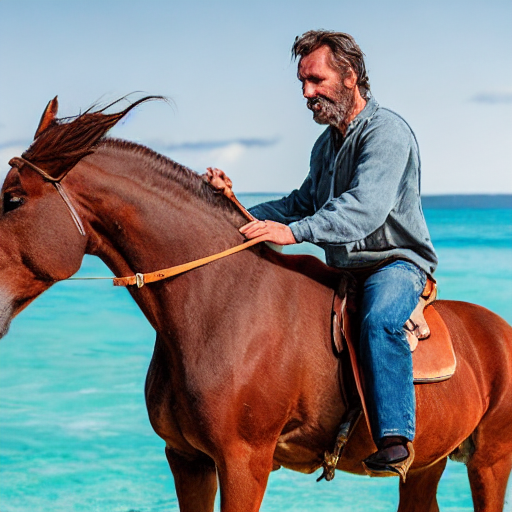

In [6]:
# prompt = "A man is riding on a horse, in the sea shore."
image = pipe(prompt).images[0]
image

In [2]:
from backend.text_to_image.multimodels import query_rewrite
prompt = query_rewrite("A man is riding on a horse, in the sea shore.")


In [3]:
prompt

'"Generate a high-resolution image of a ruggedly handsome man in his mid-30s, dressed in worn, earth-toned clothing and riding a majestic, chestnut-colored horse with a flowing mane and a gleam in its eye, as they gallop towards a serene and sun-kissed sea shore with a gentle, sandy beach and crystal-clear turquoise water, with the warm sunlight casting a golden glow on the scene, and the man\'s face set in a determined and carefree expression as he rides along the shoreline, with the sound of waves gently crashing in the background."'